Scatter plot of a run (True vs Predicted values) for Random Forest Regression Model

The Scatter Plot is estimated for data with and without imbued 0s, and for three different set of bins and before and after ReducedOverfitting. It also plots for data where the damaged values (target) are greater than 10.

In [ ]:
%load_ext jupyter_black

In [ ]:
import statistics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

from utils import get_clean_dataset

In [ ]:
df = get_clean_dataset()

In [3]:
#If you run the following line so you can have scatter plot for part of the data where damage >10

#df = df[df['DAM_perc_dmg'] > 10]

#Stratify sampling
all_0 = df['DAM_perc_dmg'].loc[df['DAM_perc_dmg'] == 0.0]
#display(all_0)

all_1 = df['DAM_perc_dmg'].loc[(0.0 < df['DAM_perc_dmg']) & (1.0 >= df['DAM_perc_dmg'])]
#display(all_1)

all_2 = df['DAM_perc_dmg'].loc[(1.0 < df['DAM_perc_dmg']) & (60.0 >= df['DAM_perc_dmg'])]
#display(all_2)

all_3 = df['DAM_perc_dmg'].loc[(60.0 < df['DAM_perc_dmg']) & (100.0 >= df['DAM_perc_dmg'])]
#display(all_3)

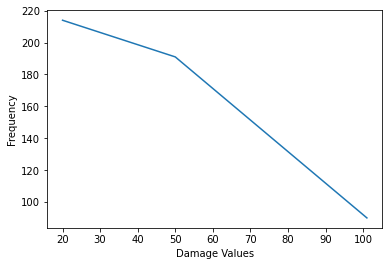

In [4]:
#The Old and New set of bins
#bins2= [0, 1, 60, 101]
#bins2 = [0, 0.00009, 1, 10, 50, 101]
bins2= [10.0009, 20, 50, 101]
samples_per_bin2, binsP2 = np.histogram(df['DAM_perc_dmg'], bins=bins2)
plt.xlabel("Damage Values")
plt.ylabel("Frequency")
plt.plot(binsP2[1:],samples_per_bin2)

In [5]:
print(samples_per_bin2)
print(binsP2)

[214 191  90]
[ 10.0009  20.      50.     101.    ]


In [6]:
bin_index2=np.digitize(df['DAM_perc_dmg'], bins=binsP2)

In [7]:
y_input_strat=bin_index2

In [8]:
#Dropping highly correlated features which their correlation values are greater than 0.99.
features =[
    'HAZ_rainfall_Total', 
    'HAZ_rainfall_max_6h',
    'HAZ_rainfall_max_24h',
    'HAZ_v_max',
    'HAZ_v_max_3',
    'HAZ_dis_track_min',
    'GEN_landslide_per',
    'GEN_stormsurge_per',
    #'GEN_Bu_p_inSSA', 
    #'GEN_Bu_p_LS', 
    'GEN_Red_per_LSbldg',
    'GEN_Or_per_LSblg', 
    'GEN_Yel_per_LSSAb', 
    #'GEN_RED_per_SSAbldg',
    'GEN_OR_per_SSAbldg',
    'GEN_Yellow_per_LSbl',
    'TOP_mean_slope',
    'TOP_mean_elevation_m', 
    'TOP_ruggedness_stdev', 
    #'TOP_mean_ruggedness',
    #'TOP_slope_stdev', 
    'VUL_poverty_perc',
    'GEN_with_coast',
    'GEN_coast_length', 
    'VUL_Housing_Units',
    'VUL_StrongRoof_StrongWall', 
    'VUL_StrongRoof_LightWall',
    'VUL_StrongRoof_SalvageWall', 
    'VUL_LightRoof_StrongWall',
    'VUL_LightRoof_LightWall', 
    'VUL_LightRoof_SalvageWall',
    'VUL_SalvagedRoof_StrongWall',
    'VUL_SalvagedRoof_LightWall',
    'VUL_SalvagedRoof_SalvageWall', 
    'VUL_vulnerable_groups',
    'VUL_pantawid_pamilya_beneficiary'
]

X = df[features]
display(X.columns)
y = df["DAM_perc_dmg"]

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,df['DAM_perc_dmg'], stratify=y_input_strat, test_size=0.2) 


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


Index(['HAZ_rainfall_Total', 'HAZ_rainfall_max_6h', 'HAZ_rainfall_max_24h',
       'HAZ_v_max', 'HAZ_v_max_3', 'HAZ_dis_track_min', 'GEN_landslide_per',
       'GEN_stormsurge_per', 'GEN_Red_per_LSbldg', 'GEN_Or_per_LSblg',
       'GEN_Yel_per_LSSAb', 'GEN_OR_per_SSAbldg', 'GEN_Yellow_per_LSbl',
       'TOP_mean_slope', 'TOP_mean_elevation_m', 'TOP_ruggedness_stdev',
       'VUL_poverty_perc', 'GEN_with_coast', 'GEN_coast_length',
       'VUL_Housing_Units', 'VUL_StrongRoof_StrongWall',
       'VUL_StrongRoof_LightWall', 'VUL_StrongRoof_SalvageWall',
       'VUL_LightRoof_StrongWall', 'VUL_LightRoof_LightWall',
       'VUL_LightRoof_SalvageWall', 'VUL_SalvagedRoof_StrongWall',
       'VUL_SalvagedRoof_LightWall', 'VUL_SalvagedRoof_SalvageWall',
       'VUL_vulnerable_groups', 'VUL_pantawid_pamilya_beneficiary'],
      dtype='object')

(6458, 31) (6458,)
(1615, 31) (1615,)


In [10]:
# create an Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

#Random Forest
#rf = RandomForestRegressor(max_depth=None, n_estimators=100, min_samples_split=8,min_samples_leaf=5)

#Random Forest Reduced Overfitting
rf = RandomForestRegressor(max_depth=None, n_estimators=100, min_samples_split=8,min_samples_leaf=5, max_samples=0.7)

rf_model=rf.fit(X_train, y_train)

In [11]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     179.9
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:16:59   Log-Likelihood:                -21397.
No. Observations:                6458   AIC:                         4.286e+04
Df Residuals:                    6426   BIC:                         4.307e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3914      0.083     28.827      0.0

In [12]:
y_pred_train = rf.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mx_train = max_error(y_train, y_pred_train)
me_train = (y_pred_train - y_train).sum()/len(y_train)

y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mx = max_error(y_test, y_pred)
me = (y_pred - y_test).sum()/len(y_test)

#df_pred=pd.DataFrame(columns = ['test', 'pred'])
#df_pred['pred'] = y_pred
#df_pred['test'] = y_test

print('----- Test  ------')
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Max error: {mx:.2f}')
print(f"Average Error: {me:.2f}")

print('---- Training -----')
print(f'Mean absolute error: {mae_train:.2f}')
print(f'Mean squared error: {mse_train:.2f}')
print(f'Root mean squared error: {rmse_train:.2f}')
print(f'Max error: {mx_train:.2f}')
print(f"Average Error: {me_train:.2f}")

----- Test  ------
Mean absolute error: 1.81
Mean squared error: 37.51
Root mean squared error: 6.12
Max error: 88.65
Average Error: -0.17
---- Training -----
Mean absolute error: 1.38
Mean squared error: 19.73
Root mean squared error: 4.44
Max error: 76.18
Average Error: 0.04


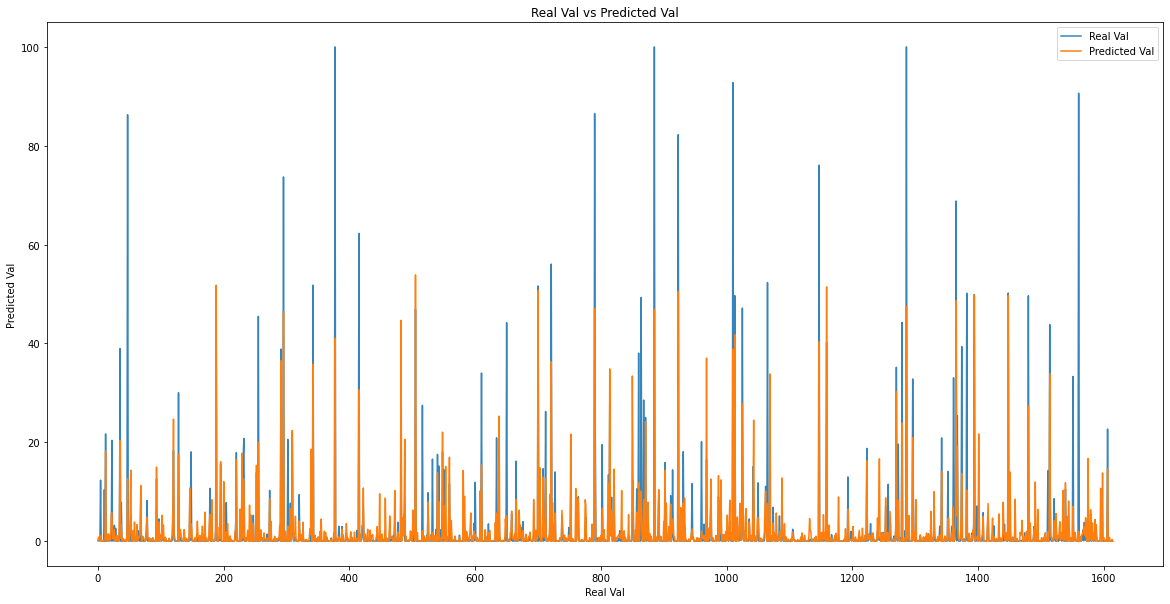

In [13]:
index = np.arange(0,len(y_test))
fig, ax = plt.subplots(1,1,figsize=(20,10))
plt.plot(index,y_test, label = 'Real Val', alpha=0.9)
plt.plot(index,y_pred, label = 'Predicted Val')
plt.title('Real Val vs Predicted Val')
plt.xlabel('Real Val')
plt.ylabel('Predicted Val')
plt.legend()

plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Difference', fontsize=10)
plt.title('True vs Difference in Predicted damaged values')
plt.axis('equal')
plt.show()

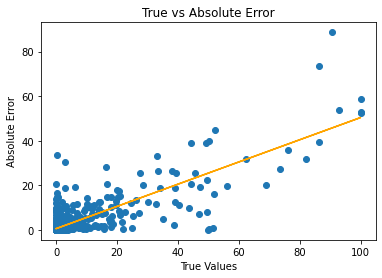

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = y_test
y = abs(y_pred - y_test)

plt.scatter(x, y, cmap='viridis')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='orange')


plt.xlabel('True Values', fontsize=10)
plt.ylabel('Absolute Error', fontsize=10)
plt.title('True vs Absolute Error')
plt.show()